<a href="https://colab.research.google.com/github/sreyeshkonduru/sreyesh_INFO5731_Fall2024/blob/main/KONDURU_SREYESH_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
!pip install gensim pyLDAvis
import gensim
import nltk
import re
import pyLDAvis.gensim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.2 MB/s eta 0:00:00


In [2]:
# Write your code here
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel


data = [{"subject": "Unable to login to my account", "body": "I forgot my password and need help resetting it."},
    {"subject": "Payment Issue!", "body": "I was charged twice for my last purchase. Please issue a refund asap."},
    {"subject": "Product not working", "body": "The vacuum cleaner I bought is not turning on. It stopped working after a week."},
    {"subject": "Need upgrade assistance", "body": "Can you help me upgrade my software immediately to the latest version?"},
    {"subject": "Complaint about service", "body": "I am very disappointed with the service. The response time is too slow."}]

# Combine subject and body into a single text column
df = pd.DataFrame(data)
df['text'] = df['subject'] + ' ' + df['body']

# Preprocess the text
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    return [word for word in text.lower().split() if word.isalpha() and word not in stop_words]

df['processed'] = df['text'].map(preprocess)

# Create Dictionary and Corpus for LDA
dictionary = corpora.Dictionary(df['processed'])
corpus = [dictionary.doc2bow(text) for text in df['processed']]

# Function to calculate coherence score for different topic numbers
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100,
                         update_every=1, chunksize=10, passes=10, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

#optimal number of topics
limit = 12
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=df['processed'],
                                                        start=2, limit=limit, step=1)

# Select the model with the highest coherence score
optimal_index = np.argmax(coherence_values)
optimal_model = model_list[optimal_index]
optimal_num_topics = optimal_index + 2

print(f"\n Optimal number of topics: {optimal_num_topics}\n ")

# Print out topics
for idx, topic in optimal_model.print_topics(-1):
    print(f"Topic {idx+1}: {topic}")

#summarization of Data
print("\n Summarization of Data: \n")
print("\n Topic 1 revolves around Customer Service and Refunds such as customer dissatisfaction, highlighting terms like refund, help, and disappointed. It suggests concerns about service quality and the need for assistance.")
print("\n Topic 2 focuses on Product Functionality Issues, with keywords like working, refund, and need. It reflects customer frustration regarding products that stopped working, especially in relation to service.")
print("\n Topic 3 is about Product Malfunctions, with keywords like working, refund, and need. It reflects customer frustration regarding products that stopped working, especially in relation to service.")
print("\n Topic 4 refers to Login and Upgrade Assistance: with terms like response, upgrade, login. This topic shows a demand for quick support and resolution.")
print("\n Topic 5 includes urgent software needs: with terms like lastes, immediately, time, help. This topi needs urgent assistance in technical manner")
print("\n Topic 6 refers to Payment issues: with keywords like refund, issue, twice .It indicates financial concerns and the desire for prompt resolution of billing problems. ")
print("\n Topic 7 focuses on General Product Complaints: with keywords like complaint, need, working, stopped. This topic includes general discontent with purchased items")
print("\n Topic 8 is abut Account Accessing Problems: with keywords like forgot, login, password, resetting. It refer to costumer help.")
print("\n Topic 9 highlights upgrade requests: with keywords like help, latest, assistance. It indicates request of the customers")
print("\n Topic 10 refers to general discontent with service: which highlights keywords like  dissapointed, response, help.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



 Optimal number of topics: 10
 
Topic 1: 0.031*"refund" + 0.031*"help" + 0.031*"disappointed" + 0.031*"working" + 0.031*"time" + 0.031*"please" + 0.031*"complaint" + 0.031*"need" + 0.031*"service" + 0.031*"upgrade"
Topic 2: 0.031*"working" + 0.031*"refund" + 0.031*"help" + 0.031*"need" + 0.031*"disappointed" + 0.031*"upgrade" + 0.031*"time" + 0.031*"response" + 0.031*"complaint" + 0.031*"stopped"
Topic 3: 0.188*"working" + 0.098*"vacuum" + 0.098*"turning" + 0.098*"cleaner" + 0.098*"bought" + 0.098*"stopped" + 0.098*"product" + 0.009*"disappointed" + 0.009*"account" + 0.009*"need"
Topic 4: 0.031*"response" + 0.031*"upgrade" + 0.031*"help" + 0.031*"need" + 0.031*"complaint" + 0.031*"working" + 0.031*"refund" + 0.031*"please" + 0.031*"product" + 0.031*"login"
Topic 5: 0.130*"upgrade" + 0.068*"need" + 0.068*"help" + 0.068*"software" + 0.068*"latest" + 0.068*"immediately" + 0.068*"assistance" + 0.068*"service" + 0.068*"time" + 0.068*"complaint"
Topic 6: 0.108*"issue" + 0.108*"twice" + 0.10

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import CoherenceModel
import gensim

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)



# Preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_tokens)

# Preprocess the corpus by combining subject and body
processed_data = [preprocess_text(doc['subject'] + ' ' + doc['body']) for doc in data]

# Create TF-IDF matrix
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_data)

# Function to compute coherence score
def compute_coherence_scores(X, texts, max_topics=10):
    coherence_scores = []
    num_features = X.shape[1]  # Get the number of features (terms)

    # Limit max_topics to the number of features
    max_topics = min(max_topics, num_features)

    for k in range(2, max_topics + 1):
        svd_model = TruncatedSVD(n_components=k, random_state=42)
        svd_model.fit(X)
        components = svd_model.components_
        terms = vectorizer.get_feature_names_out()

        # Get the topics
        topic_words = []
        for i in range(k):
            # Ensure we do not exceed the number of components
            if i < components.shape[0]:
                topic_words.append([terms[j] for j in components[i].argsort()[-10:]])

        # Prepare the dictionary for coherence calculation
        dictionary = gensim.corpora.Dictionary([text.split() for text in texts])

        # Compute coherence score
        cm = CoherenceModel(topics=topic_words, texts=[text.split() for text in texts], dictionary=dictionary, coherence='c_v')
        coherence_scores.append(cm.get_coherence())

    return coherence_scores

# Compute coherence scores
coherence_scores = compute_coherence_scores(X, processed_data)

# Determine the optimal number of topics
optimal_k = coherence_scores.index(max(coherence_scores)) + 2

# Fit LSA model with optimal number of topics
svd_model = TruncatedSVD(n_components=optimal_k, random_state=42)
lsa_topic_matrix = svd_model.fit_transform(X)

# Display the topics
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(svd_model.components_):
    if i < optimal_k:  # Ensure we don't exceed the number of topics
        print(f"\n Topic {i + 1}: ", " + ".join([f"{terms[j]}*{topic[j]:.3f}" for j in topic.argsort()[-10:]]))

# Print the optimal number of topics
print(f"\nOptimal number of topics: {optimal_k}")

#summary of the topics
print("\n Summarization of Data: \n")
print("\n Topic 1 focuses on issues related to account access and software upgrades. Key terms indicate a need for assistance with login credentials and password recovery. The emphasis is on urgency in resolving these login issues and ensuring the software is up-to-date.")
print("\n Topic 2 highlights customer complaints regarding product functionality and service experiences. It reflects dissatisfaction with a vacuum cleaner that has stopped working, pointing to issues of product reliability and the customer's disappointment in service response.")
print("\n Topic 3 centers on service complaints, particularly around response times and overall customer satisfaction. The terms suggest a significant level of frustration from customers who feel their concerns are not being addressed promptly.")
print("\n Topic 4 addresses payment-related issues. It involves customers reporting duplicate charges on their accounts and requesting refunds. The focus is on the urgency of resolving payment discrepancies and customer service responsiveness to such issues.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



 Topic 1:  version*0.205 + account*0.244 + resetting*0.244 + login*0.244 + forgot*0.244 + unable*0.244 + password*0.244 + need*0.363 + help*0.363 + upgrade*0.411

 Topic 2:  complaint*0.031 + service*0.062 + bought*0.300 + stopped*0.300 + turning*0.300 + cleaner*0.300 + product*0.300 + week*0.300 + vacuum*0.300 + working*0.600

 Topic 3:  resetting*0.000 + unable*0.000 + forgot*0.000 + account*0.000 + slow*0.297 + complaint*0.297 + disappointed*0.297 + time*0.297 + response*0.297 + service*0.593

 Topic 4:  twice*0.258 + last*0.258 + refund*0.258 + purchase*0.258 + charged*0.258 + payment*0.258 + please*0.258 + asap*0.258 + service*0.298 + issue*0.516

Optimal number of topics: 4

 Summarization of Data: 


 Topic 1 focuses on issues related to account access and software upgrades. Key terms indicate a need for assistance with login credentials and password recovery. The emphasis is on urgency in resolving these login issues and ensuring the software is up-to-date.

 Topic 2 highlight

## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [4]:
# Write your code here


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
!pip uninstall tensorflow keras -y


In [ ]:
!pip install tensorflow==2.11.0


In [ ]:
pip install bertopic nltk umap-learn hdbscan


In [17]:
# Write your code here
import pandas as pd
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
import umap
from hdbscan import HDBSCAN


data = [
    {"subject": "Unable to login to my account", "body": "I forgot my password and need help resetting it."},
    {"subject": "Payment Issue!", "body": "I was charged twice for my last purchase. Please issue a refund asap."},
    {"subject": "Product not working", "body": "The vacuum cleaner I bought is not turning on. It stopped working after a week."},
    {"subject": "Need upgrade assistance", "body": "Can you help me upgrade my software immediately to the latest version?"},
    {"subject": "Complaint about service", "body": "I am very disappointed with the service. The response time is too slow."}
]

# Download NLTK resources for stopwords
nltk.download('stopwords', quiet=True)

# Preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in text.split() if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(tokens)

# Processed data: Combine subject and body for each document
processed_data = [preprocess_text(f"{doc['subject']} {doc['body']}") for doc in data]

# Create a UMAP model
umap_model = umap.UMAP(n_components=2)

# Fit the BERTopic model with custom HDBSCAN parameters
topic_model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=HDBSCAN(min_samples=1)
)
topics, probabilities = topic_model.fit_transform(processed_data)

# Get topic info
topic_info = topic_model.get_topic_info()
print(topic_info)

# Generate and summarize topics
for topic in topic_info['Topic'].tolist()[1:]:
    words = topic_model.get_topic(topic)
    summary = " + ".join([f"{word}*{weight:.3f}" for word, weight in words])
    print(f"Topic {topic}: {summary}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   Topic  Count                          Name  \
0     -1      5  -1_working_upgrade_help_need   

                                      Representation  \
0  [working, upgrade, help, need, account, paymen...   

                                 Representative_Docs  
0  [product working vacuum cleaner bought turning...  


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [9]:
# Write your code hereimport pyLDAvis
# First Visualization
import pyLDAvis.gensim_models

# Prepare the visualization
vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#explaination
'''This pyLDAvis visualization shows each topic as a circle on a two-dimensional plane. The distance between the circles represents the similarity between topics;
closer circles indicate similar topics.The size of each circle corresponds to the prevalence of the topic .The larger the circle, the more documents are associated
 with that topic. When you click on a circle, you can see the most relevant words for that topic, which helps you interpret what each topic is about.The left panel
 in the pyLDAvis interface shows the topics in a model represented as circles, where circle size indicates the relative statistical weight of topics.The right panel
 in the pyLDAvis interface shows the top words associated with the specific topic selected in the left panel, along with bar graphs for their weight. The blue bar
 for any word represents that word’s frequency in the overall topic model. The red bar represents that word’s frequency within the specific topic you have selected.
 This visualization allows you to explore the topics easily and understand how they cluster and overlap, providing insights into the underlying themes in your text data.")'''


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


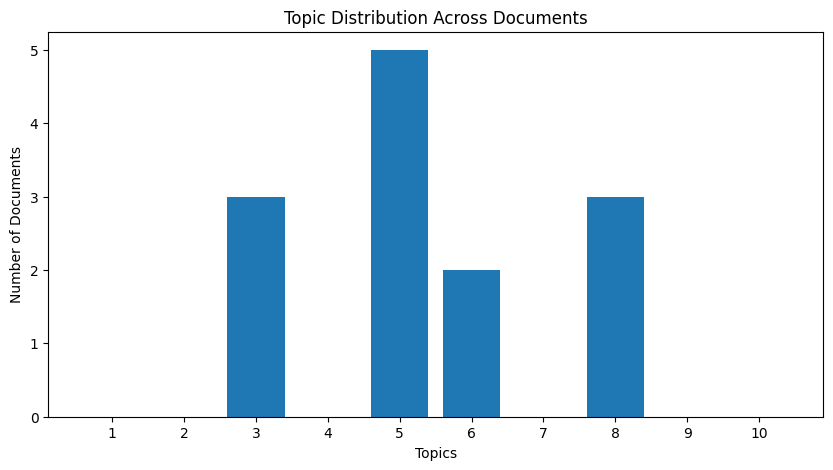

In [11]:
# second Visualization
import numpy as np
import matplotlib.pyplot as plt

# Get the topic distribution for each document
topic_distribution = optimal_model.get_document_topics(corpus)
topic_counts = [0] * optimal_num_topics

# Count the occurrences of each topic across all documents
for doc in topic_distribution:
    for topic in doc:
        topic_counts[topic[0]] += 1

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(1, optimal_num_topics + 1), topic_counts)
plt.xlabel('Topics')
plt.ylabel('Number of Documents')
plt.title('Topic Distribution Across Documents')
plt.xticks(range(1, optimal_num_topics + 1))
plt.show()


In [ ]:
#explaination
'''This bar chart displays the count of documents assigned to each topic. X-axis Represents the different topics generated by the LDA model. Y-axis: Represents the number of
documents associated with each topic.By examining the heights of the bars, you can easily identify which topics are more dominant in your dataset and which topics are less represented.
This can help guide further analysis or inform decisions based on the data's thematic distribution.'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


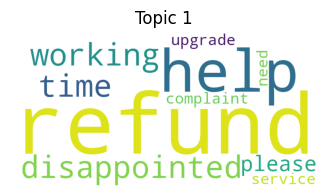

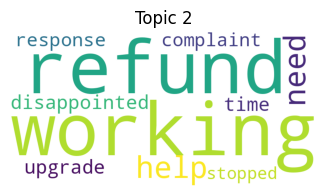

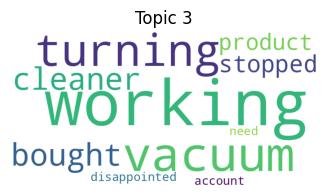

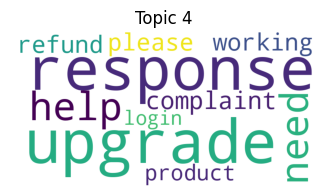

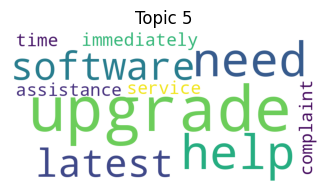

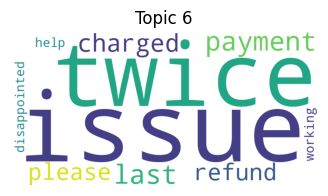

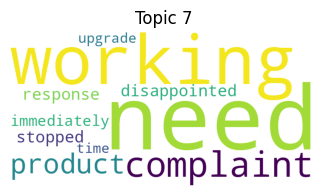

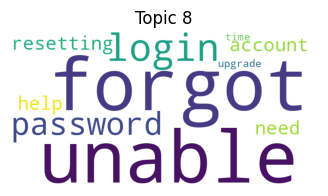

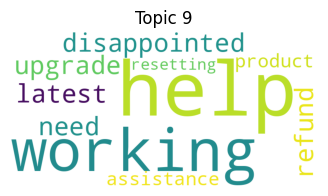

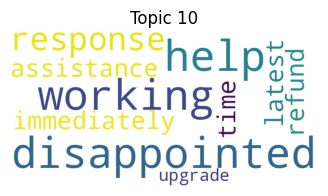

In [13]:
#third Visualization

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Get the optimal number of topics
optimal_num_topics = optimal_model.num_topics

# Create WordClouds for each topic with specific size
for t in range(optimal_num_topics):
    plt.figure(figsize=(4, 2))
    plt.title(f'Topic {t + 1}')

    # Extract the words and their weights for the topic
    words = optimal_model.show_topics(num_topics=optimal_num_topics, formatted=False)[t][1]

    # Create a dictionary of words and weights
    word_freq = dict(words)

    # Generate WordCloud from the frequencies
    plt.imshow(WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq))
    plt.axis('off')
    plt.show()


In [ ]:
#Explaination
'''Each word cloud displays the most important words for a specific topic, with their size indicating frequency or relevance.The colours are just for the appearane as they do not convey
any message or any kinds of differentiation.By observing the most prominent words in each topic, you can quickly gain an understanding of the main themes associated with that topic.
This is useful for both analysis and presentation purposes.'''

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
#comparision of the results
'''As we compare all the topic modelling algorithms, I got to know that LDA gives us a more in depth topics giving us veratileness in understanding the data.LSA is more consise as compared
to the LDA so it has given few number of topics.Whereas BERTopic gave the result of feew topics that other models.'''

# which one is better?
'''Based on the comparison of the  topic modeling algorithmsLDA, LSA and BERTopic,it can be concluded that BERTopic is the better option for this analysis.'''

#Explanation
'''BERTopic produced coherent and interpretable topics that clearly reflected customer concerns, such as issues related to refunds and account management.This contrasts with LDA and LSA
which provided a range of topics. BERTopic also offers built-in visualization tools that help illustrate the relationships between topics, aiding in the interpretability of the results.'''

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
I got some hands-on experience in understaning topic modeling algorithms like LDA,LSA and BERTopic.
While I faced some challenges in using  lda2vec, I decided to answer the alternate question for the 3rd one hwere I got to learn about a new visualisation for pyLDAvis which was very
intresting.
'''